[Table of Contents](http://nbviewer.ipython.org/github/rlabbe/Kalman-and-Bayesian-Filters-in-Python/blob/master/table_of_contents.ipynb)

# Discrete Bayes Filter

In [1]:
#format the book
%matplotlib inline
%load_ext autoreload
%autoreload 2
from __future__ import division, print_function
from book_format import load_style, figsize, set_figsize
load_style()

## Question Description: Tracking a Cruise Robot

In [13]:
import numpy as np

pos_belief = np.array([.1, .1, .1, .1, .1, .1, .1, .1, .1, .1])

In [14]:
hallway = np.array([1, 1, 0, 0, 0, 0, 0, 0, 1, 0])

In [15]:
import matplotlib.pyplot as plt
import book_plots as bp

set_figsize(y=5)

In [16]:
pos_belief = hallway * (1/3)
np.set_printoptions(precision=3)
print(pos_belief)

[ 0.333  0.333  0.     0.     0.     0.     0.     0.     0.333  0.   ]


## Update Distribution after Measurement

probability of door = 0.1875
probability of wall = 0.0625


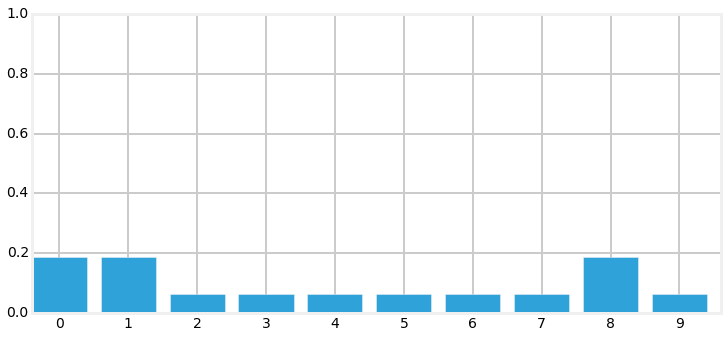

In [17]:
def normalize(prob_dist):
    """ Normalize probability distribution"""
    prob_dist /= sum(prob_dist)   

def update(map_, belief, z, prob_correct):
    scale = prob_correct / (1. - prob_correct)
    for i, val in enumerate(map_):
        if val == z:
            belief[i] *= scale
    normalize(belief)

pos_belief = np.array([0.1] * 10)
update(hallway, pos_belief, 1, prob_correct=.75)

print('probability of door =', pos_belief[0])
print('probability of wall =', pos_belief[2])
bp.bar_plot(pos_belief)

## Predict

belief before predict = [ 0.35  0.1   0.2   0.3   0.    0.    0.    0.    0.    0.05]
belief after predict = [ 0.05  0.35  0.1   0.2   0.3   0.    0.    0.    0.    0.  ]


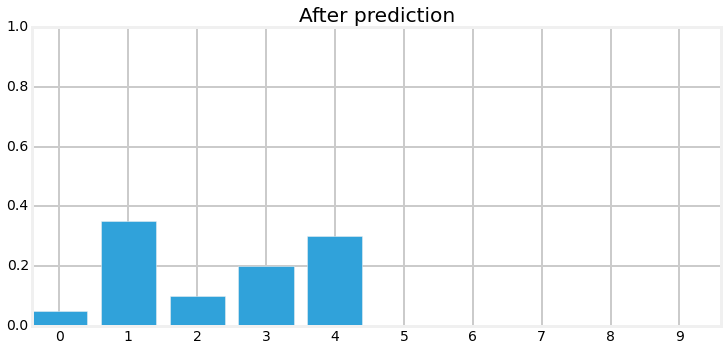

In [18]:
def perfect_predict(pos_belief, move):
    """ move the position by 'move' spaces, where positive is to the right, 
    and negative is to the left
    """
    n = len(pos_belief)
    result = np.zeros(n)
    for i in range(n):
        result[i] = pos_belief[(i-move) % n]
    pos_belief[:] = result # copy back to original array
        
pos_belief = np.array([.35, .1, .2, .3, 0, 0, 0, 0, 0, .05])
print('belief before predict =', pos_belief)
bp.bar_plot(pos_belief, title='Before prediction')

perfect_predict(pos_belief, 1)
print('belief after predict =', pos_belief)
bp.bar_plot(pos_belief, title='After prediction')

## Adding Noise to the Prediction

## Convolution

In [23]:
def predict(prob_dist, offset, kernel):
    N = len(prob_dist)
    kN = len(kernel)
    width = int((kN - 1) / 2)

    result = np.zeros(N)
    for i in range(N):
        for k in range (kN):
            index = (i + (width-k) - offset) % N
            result[i] += prob_dist[index] * kernel[k]
    prob_dist[:] = result[:] # update belief

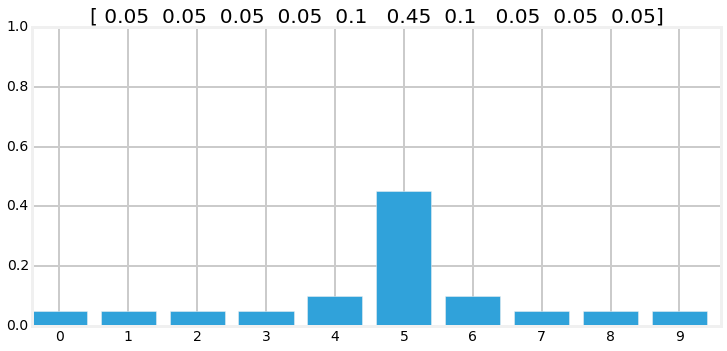

In [25]:
belief = np.array([.05, .05, .05, .05, .55, .05, .05, .05, .05, .05])
predict(belief, 1, [0.1, 0.8, 0.1])
bp.bar_plot(belief,title=belief)

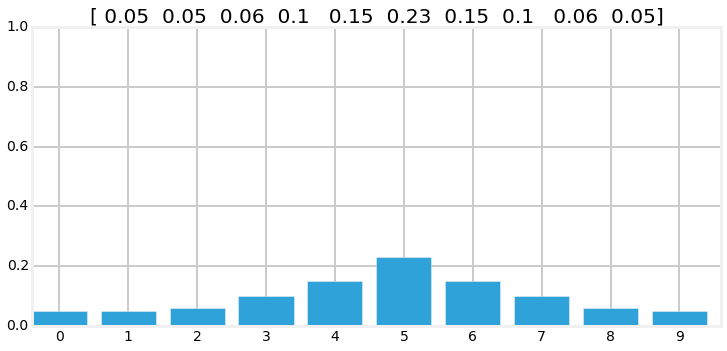

In [55]:
belief = np.array([.05, .05, .05, .05, .55, .05, .05, .05, .05, .05])
#Change the range to see how information get lost by prediction.
for i in range(1):
    predict(belief, 1, [.02, .1, .2, .36, .2, .1, .02])

bp.bar_plot(belief,title=belief)

<img src="animations/02_no_info.gif">

## Recurse

hallway--[1, 1, 0, 0, 0, 0, 0, 0, 1, 0]
measurements--[1, 1, 0]

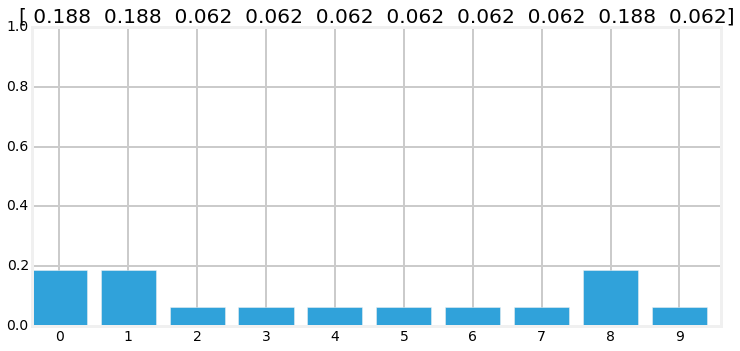

In [36]:
#1.Robot says it's at a beacon
hallway = np.array([1, 1, 0, 0, 0, 0, 0, 0, 1, 0])
pos_belief = np.array([.1] * 10)
update(hallway, pos_belief, z=1, prob_correct=.75)
bp.bar_plot(pos_belief,title=pos_belief)

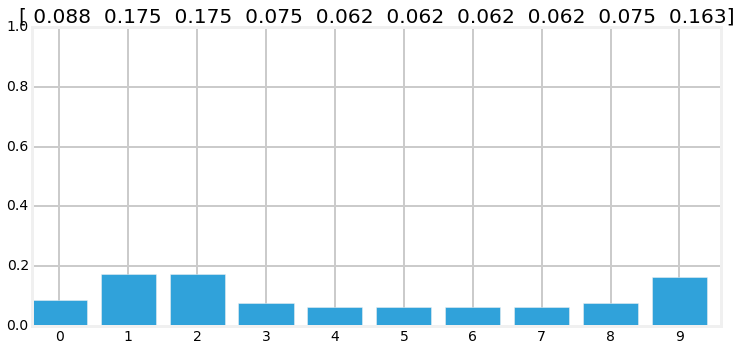

In [37]:
#2.Robot's suppose distribution after one step
kernel = (.1, .8, .1)
predict(pos_belief, 1, kernel)
bp.bar_plot(pos_belief,title=pos_belief)

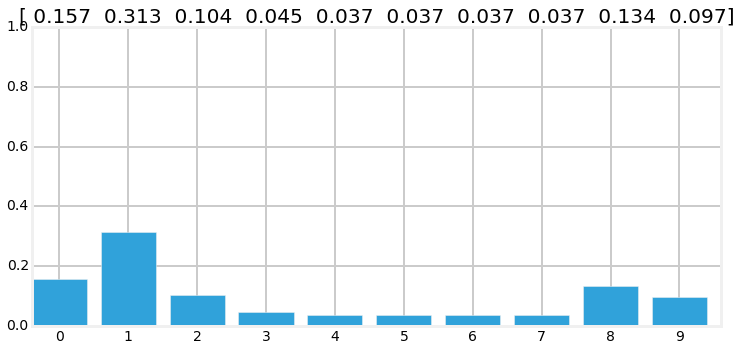

In [38]:
#3.Robot says it's at a beacon again
update(hallway, pos_belief, z=1, prob_correct=.75)
bp.bar_plot(pos_belief,title=pos_belief)

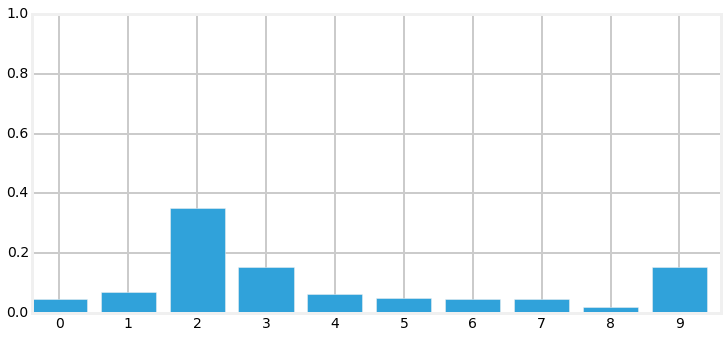

In [39]:
#4.Robot's suppose distribution after another step
predict(pos_belief, 1, kernel)
update(hallway, pos_belief, z=0, prob_correct=.75)
bp.bar_plot(pos_belief)

[ 0.22  0.06  0.06  0.06  0.09  0.22  0.06  0.06  0.06  0.09]


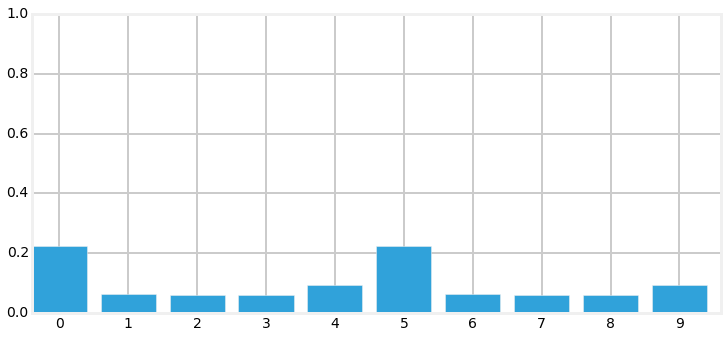

In [56]:
#Play with it.
hallway = [1, 0, 1, 0, 0, 1, 0, 1, 0, 0]
kernel = (.1, .8, .1)
pos_belief = np.array([.1] * 10)
measurements = [1, 0, 1, 0, 0]

for m in measurements:
    update(hallway, pos_belief, z=m, prob_correct=.75)
    predict(pos_belief, 1, kernel)
bp.bar_plot(pos_belief)
print(pos_belief)